<a href="https://colab.research.google.com/github/Hello-XiH/Text-Analytics/blob/main/FE_Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Financial Econometrics & Machine Learning: Text Analytics

## System Set Up

In [ ]:
pip install gensim nltk

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
from gensim import corpora, models
import pickle

## File Upload & Inspection

In [ ]:
# Upload files from the local machine, and the file will be stored in Colab for processing.
from google.colab import files
uploaded = files.upload()

Saving DJN_2017-01.pkl to DJN_2017-01.pkl


In [ ]:
# Get the filename of the uploaded file
text = next(iter(uploaded))

# Load the data from the pickle file into a DataFrame.
df = pd.read_pickle(text)

# Display the DataFrame.
df

,Date,Company,Title,Article,Compound_Return,Day1_Return
0,20170101,[ATC.AE],"[press, release, murphy, owner, kxly, abc, cha...","[remove, it, programming, wire, despite, willi...",NaN,NaN
1,20170101,[ARKR],"[ark, restaurant, apos, ceo, weinstein, result...","[from, seek, earnings]",0.070817,0.008468
2,20170101,[F],"[like, futurist, be, prepare, totally, unexpec...","[by, in, resident, futurist, lead, team, imagi...",0.076860,0.046068
3,20170101,[NCOM],"[press, release, national, commerce, corporati...","[part, family, globe, ncc, parent, company, he...",-0.020161,-0.004098
4,20170101,[EDE],"[press, release, district, electric, company, ...","[wire, closing, today, merger, company, subsid...",NaN,NaN
...,...,...,...,...,...,...
27408,20170131,[LTRX],"[press, release, global, iot, leader, lantroni...","[global, to, globe, nasdaq, ltrx, global, prov...",-0.110639,-0.032407
27409,20170131,[UKDAY],"[morning, brief, trump, hit, out, aposdevalued...","[rebound, dollar, low, bond, see, touch, weak,...",NaN,NaN
27410,20170131,[AAPL],"[cheap, rival, eat, away, apple, sale, china]","[by, wall, train, station, metropolis, paper, ...",0.063700,0.004279
27411,20170131,[539448.BY],"[interglobe, aviation, fall, more, after, repo...","[extends, week, aposs, slide, big, way, today,...",NaN,NaN


In [ ]:
# Make sure that nltk resources are downloaded (run once)
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Preprocessing

In [ ]:
def preprocess(text):
  # Ensure text is a string.
    if not isinstance(text, str):
        text = ' '.join(text)
    # Set of stopwords and punctuation to remove.
    stop = set(stopwords.words('english'))
    exclude = set(string.punctuation)
    # Initialize lemmatizer.
    lemma = WordNetLemmatizer()
    # Remove stopwords.
    stop_free = " ".join([word for word in text.lower().split() if word not in stop])
    # Remove punctuation.
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    # Lemmatize words.
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())

    return normalized


## Running LDA Model

In [ ]:
# Preprocess and tokenize each document in the 'Article' column.
doc_clean = [preprocess(doc).split() for doc in df['Article']]

# Create a dictionary from the processed documents.
dictionary = corpora.Dictionary(doc_clean)

# Create a document-term matrix.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# Run the LDA model with 20 topics.
ldamodel = models.ldamodel.LdaModel(doc_term_matrix, num_topics=20, id2word = dictionary, passes=50)

# Print the top 10 keywords for each topic.
for i, topic in ldamodel.show_topics(formatted=True, num_topics=20, num_words=10):
    print(f"Topic {i+1}: {topic}\n")

Topic 1: 0.031*"offs" + 0.020*"government" + 0.018*"insurance" + 0.016*"tax" + 0.014*"state" + 0.013*"program" + 0.013*"claim" + 0.013*"employee" + 0.012*"student" + 0.010*"agency"

Topic 2: 0.016*"production" + 0.016*"project" + 0.015*"gas" + 0.014*"exploration" + 0.014*"oil" + 0.013*"gold" + 0.008*"result" + 0.008*"grade" + 0.008*"well" + 0.008*"development"

Topic 3: 0.025*"solution" + 0.024*"technology" + 0.016*"customer" + 0.013*"service" + 0.012*"provide" + 0.010*"product" + 0.010*"platform" + 0.009*"system" + 0.009*"network" + 0.009*"software"

Topic 4: 0.029*"say" + 0.027*"year" + 0.018*"company" + 0.014*"aposs" + 0.014*"billion" + 0.008*"rise" + 0.008*"market" + 0.008*"apost" + 0.008*"last" + 0.008*"price"

Topic 5: 0.061*"statement" + 0.048*"look" + 0.024*"result" + 0.022*"risk" + 0.017*"future" + 0.016*"release" + 0.016*"information" + 0.016*"may" + 0.014*"factor" + 0.013*"uncertainty"

Topic 6: 0.048*"loan" + 0.037*"million" + 0.034*"interest" + 0.028*"income" + 0.027*"tota

## Plotting

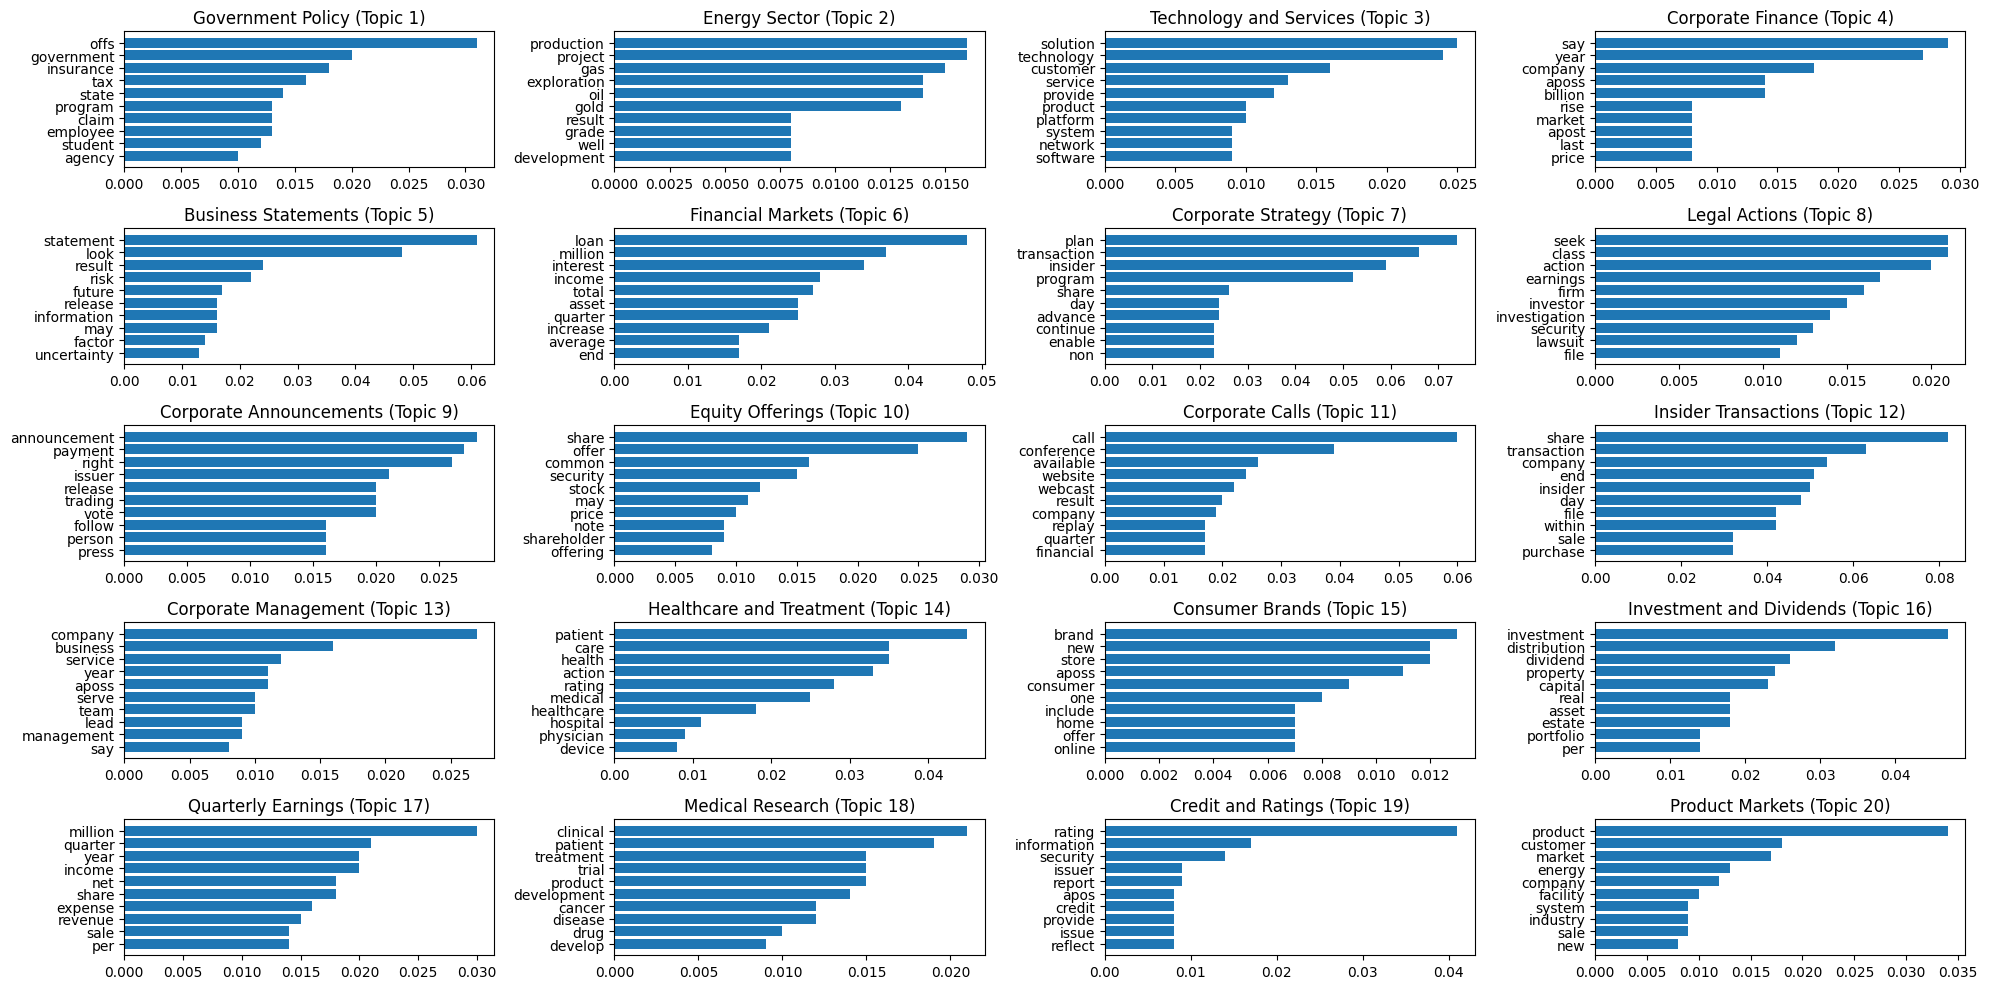

In [ ]:
import matplotlib.pyplot as plt

# Based on the output, we manually name each topic
topic_names = {
    1: 'Government Policy',
    2: 'Energy Sector',
    3: 'Technology and Services',
    4: 'Corporate Finance',
    5: 'Business Statements',
    6: 'Financial Markets',
    7: 'Corporate Strategy',
    8: 'Legal Actions',
    9: 'Corporate Announcements',
    10: 'Equity Offerings',
    11: 'Corporate Calls',
    12: 'Insider Transactions',
    13: 'Corporate Management',
    14: 'Healthcare and Treatment',
    15: 'Consumer Brands',
    16: 'Investment and Dividends',
    17: 'Quarterly Earnings',
    18: 'Medical Research',
    19: 'Credit and Ratings',
    20: 'Product Markets'
}

# Retrieve the top words and their weights for each topic.
topics = ldamodel.show_topics(formatted=True, num_topics=20, num_words=10)

# Prepare data for plotting.
data_for_plotting = []
for topic_no, topic in topics:
    words_weights = topic.split("+")
    words = [ww.split("*")[1].replace('"', '').strip() for ww in words_weights]
    weights = [float(ww.split("*")[0]) for ww in words_weights]
    data_for_plotting.append({"topic": topic_no+1, "words": words, "weights": weights, "name": topic_names[topic_no+1]})

# Set up the subplots.
fig, axs = plt.subplots(5, 4, figsize=(20, 10))
axs = axs.flatten()

# Plot each topic's keywords and their weights.
for data, ax in zip(data_for_plotting, axs):
    ax.barh(data["words"], data["weights"])
    ax.set_title(f"{data['name']} (Topic {data['topic']})")
    ax.invert_yaxis()

# Adjust layout and display the plot.
plt.tight_layout()
plt.show()
